<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Project-2/Climate-EDA-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

#Data exploration

In [2]:
url = 'https://raw.githubusercontent.com/james-monahan/Code-school-notebooks/main/Project-2/all_data.csv'
df = pd.read_csv(url, index_col=0)
cols = list(df.columns)
df.tail()

#1950's df
df_1950 = df.loc[1950:,:]

#scaled df
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.index = df.index

#Group columns by type
cols_climate = ['Ocean_npgo_mean', 'Ocean_sla_mean', 'Ocean_ph', 'mean_global_temp',
                  'upper_ocean_mean_temp', 'population']
cols_non_manmade = ['Solar_TSI', 'Volcanic_ERF', 'Water_vapor', 'volcano_num_eruptions',
                  'volcano_sum_strength', 'volcano_mean_strength','population']
cols_soft = ['Land_Use_Value', 'Number_of_disasters', 'energy_production-mtoe', 'population']
high_corr = list(df.corr()['mean_global_temp'].nlargest(6).index) #adjustable
high_corr2 = ['mean_global_temp', 'upper_ocean_mean_temp', 'population', 'energy_production-mtoe']

In [3]:
#correlation by group
df[high_corr].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,mean_global_temp,upper_ocean_mean_temp,population,Ocean_sla_mean,energy_production-mtoe,Number_of_disasters
mean_global_temp,1.00,0.94,0.93,0.90,0.90,0.89
upper_ocean_mean_temp,0.94,1.00,0.87,0.77,0.83,0.80
population,0.93,0.87,1.00,1.00,1.00,0.95
Ocean_sla_mean,0.90,0.77,1.00,1.00,0.98,0.28
energy_production-mtoe,0.90,0.83,1.00,0.98,1.00,0.95
Number_of_disasters,0.89,0.80,0.95,0.28,0.95,1.00


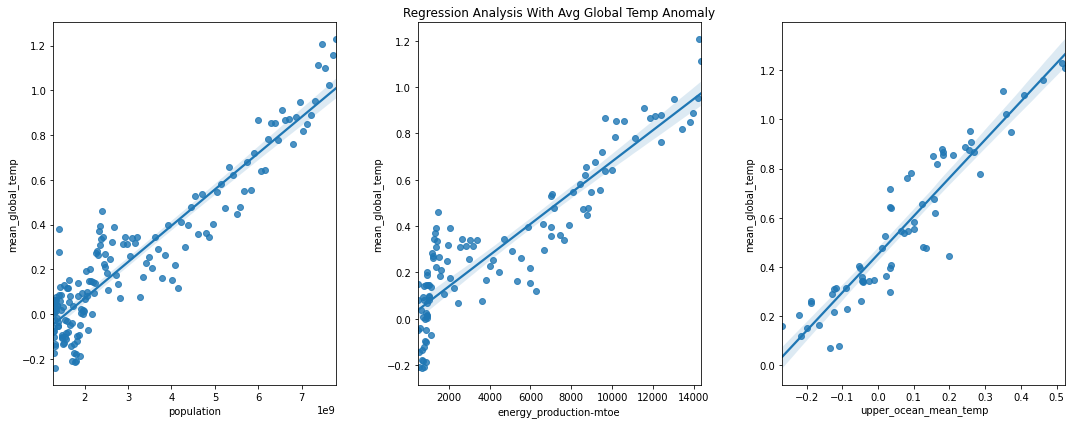

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))
sns.regplot(x="population", y="mean_global_temp", data=df.loc[1800:, :], ax=axes[0])
sns.regplot(x="energy_production-mtoe", y='mean_global_temp', data=df.loc[1800:, :], ax=axes[1]).set_title("Regression Analysis With Avg Global Temp Anomaly")
sns.regplot(x="upper_ocean_mean_temp", y='mean_global_temp', data=df.loc[1800:, :], ax=axes[2])
plt.tight_layout()
plt.show()

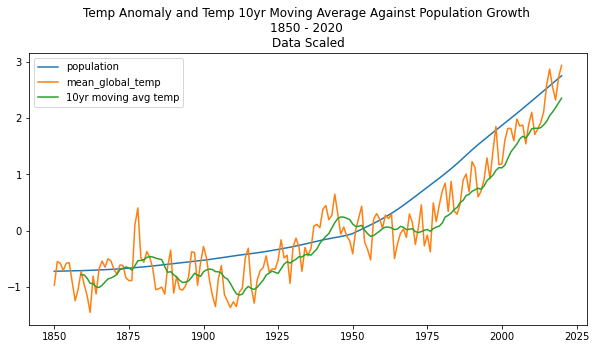

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_scaled.loc[1850:, ['population','mean_global_temp']])
plt.plot(df_scaled.loc[1850:, ['mean_global_temp']].rolling(10).mean())
plt.legend(labels = ['population','mean_global_temp','10yr moving avg temp'])
plt.title('Temp Anomaly and Temp 10yr Moving Average Against Population Growth \n1850 - 2020 \nData Scaled')
plt.show()

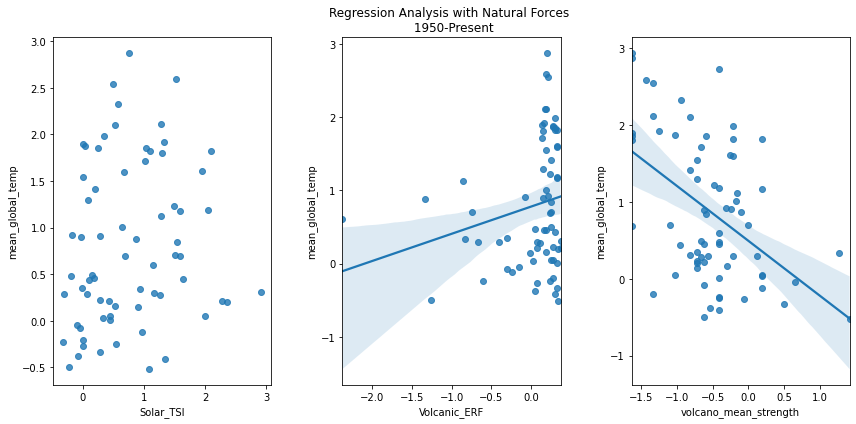

In [6]:
#Little effect shown on temperature due to non-man-made factors
# Sun and volcanos
fig, axes = plt.subplots(1, 3, figsize=(12,6))
#sns.lineplot(y="mean_global_temp", x='Solar_TSI', data=df_scaled.loc[1950:, :], ax=axes[0])
sns.regplot(y="mean_global_temp", x='Solar_TSI', data=df_scaled.loc[1950:, :], ax=axes[0], fit_reg=False)
sns.regplot(y="mean_global_temp", x='Volcanic_ERF', data=df_scaled.loc[1950:, :], 
                ax=axes[1]).set_title("Regression Analysis with Natural Forces \n 1950-Present")
sns.regplot(y="mean_global_temp", x='volcano_mean_strength', data=df_scaled.loc[1950:, :], ax=axes[2])
#plt.title('my title', loc='center')
plt.tight_layout()
plt.show()

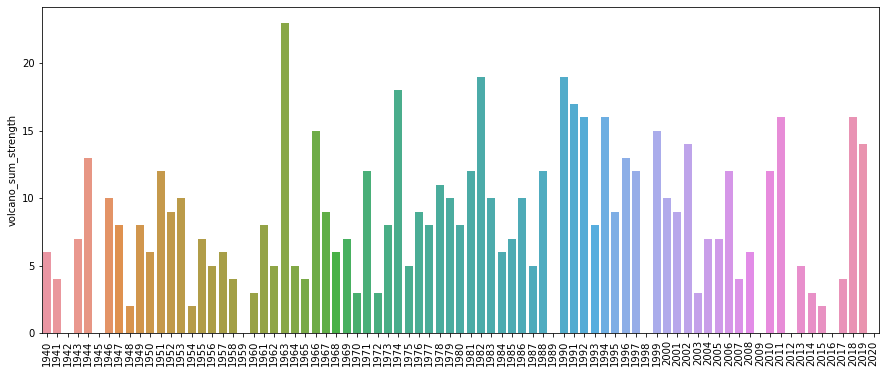

In [8]:
# Exploring yearly volcanic activity
plt.figure(figsize=(15,6))
volcano = df.loc[1940:, :]
#sns.barplot(x=volcano.index, y='volcano_num_eruptions', data=volcano)
sns.barplot(x=volcano.index, y='volcano_sum_strength', data=volcano)
plt.xticks(rotation=90)
plt.show()

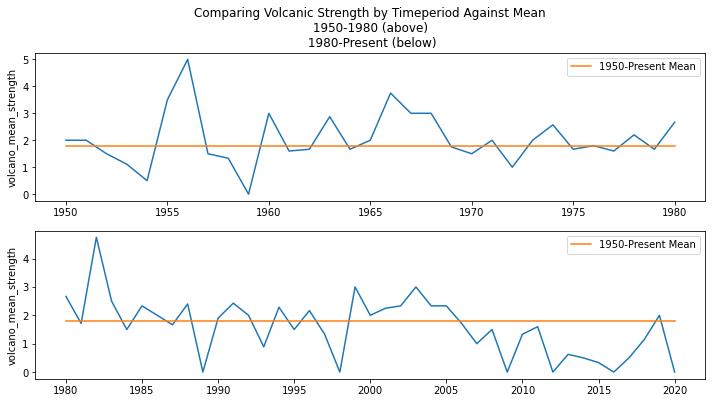

<Figure size 1080x432 with 0 Axes>

1950:1980 mean strength: 2.1141402116402115
1980:present mean strength: 1.5983643050716223


In [11]:
# Comparing volcanic actity between 'global mean' time period and present day

fig, axes = plt.subplots(2, 1, figsize=(12,6))

plt.figure(figsize=(15,6))
volcano = df.loc[1950:, :]
sns.lineplot(x=volcano.loc[1950:1980, :].index, y='volcano_mean_strength', 
             data=volcano.loc[1950:1980, :].fillna(0), ax=axes[0]).set_title("Comparing Volcanic Strength by Timeperiod Against Mean\n 1950-1980 (above) \n 1980-Present (below)")
sns.lineplot(x=volcano.loc[1950:1980, :].index, y=volcano['volcano_mean_strength'].mean(), ax=axes[0], label='1950-Present Mean')

sns.lineplot(x=volcano.loc[1980:, :].index, y='volcano_mean_strength', data=volcano.loc[1980:, :].fillna(0), ax=axes[1])
sns.lineplot(x=volcano.loc[1980:, :].index, y=volcano['volcano_mean_strength'].mean(), ax=axes[1], label='1950-Present Mean')
plt.tight_layout()

plt.show()

print("1950:1980 mean strength:",df['volcano_mean_strength'].loc[1950:1980].mean())
print("1980:present mean strength:",df['volcano_mean_strength'].loc[1980:].mean())

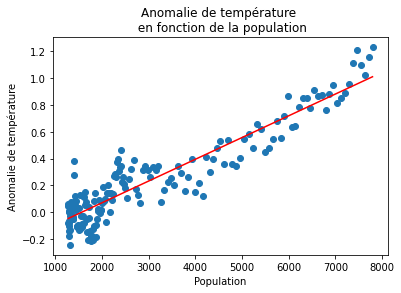

In [15]:
# population growth and temperature anomaly
X_axis = df.loc[1850:]['population']/1000000
Y_axis = df.loc[1850:]['mean_global_temp']

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 1) 

X_min = X_axis.min()
X_max = X_axis.max()
array_ = np.arange(X_min, X_max)
np.poly1d(polymodel)(array_)
poly_vals = np.poly1d(polymodel)(array_)

plt.scatter(X_axis, Y_axis)
plt.plot(array_, poly_vals, c='r'  )
plt.title("Anomalie de température \n en fonction de la population")
plt.xlabel('Population')
plt.ylabel('Anomalie de température')
plt.show()


In [16]:
df.loc[1900:]['population']/1000000

1900    1645.092253
1901    1658.157011
1902    1671.888746
1903    1686.282539
1904    1700.861629
           ...     
2016    7464.021934
2017    7547.858900
2018    7631.091113
2019    7713.468205
2020    7794.798729
Name: population, Length: 121, dtype: float64

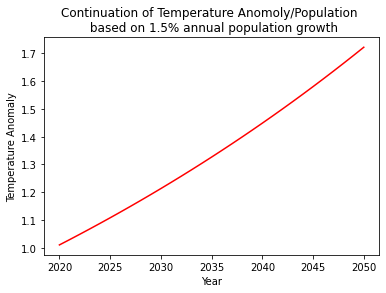

In [18]:
#prediction based on continued population growth
pop_proj = [7.794799e+09]
proj_year = [2020]
ann_growth_rate = .015
for i in range(30):
  pop_proj.append((pop_proj[-1]*ann_growth_rate)+pop_proj[-1])
  proj_year.append((proj_year[-1])+1)

array_pop_proj = np.array(pop_proj)/1000000
y_poly_vals = np.poly1d(polymodel)(array_pop_proj)
plt.plot(proj_year, y_poly_vals, c='r'  )
plt.title("Continuation of Temperature Anomoly/Population \n based on 1.5% annual population growth")
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()